In [4]:
import kaggle

In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|1         | 1.00M/66.0M [00:01<01:20, 842kB/s]
  3%|3         | 2.00M/66.0M [00:01<00:39, 1.68MB/s]
  5%|4         | 3.00M/66.0M [00:01<00:24, 2.71MB/s]
  8%|7         | 5.00M/66.0M [00:01<00:12, 5.04MB/s]
 12%|#2        | 8.00M/66.0M [00:01<00:06, 8.81MB/s]
 15%|#5        | 10.0M/66.0M [00:01<00:05, 10.9MB/s]
 18%|#8        | 12.0M/66.0M [00:02<00:04, 12.8MB/s]
 23%|##2       | 15.0M/66.0M [00:02<00:03, 15.7MB/s]
 26%|##5       | 17.0M/66.0M [00:02<00:03, 16.4MB/s]
 30%|###       | 20.0M/66.0M [00:02<00:02, 17.7MB/s]
 35%|###4      | 23.0M/66.0M [00:02<00:02, 18.4MB/s]
 39%|###9      | 26.0M/66.0M [00:02<00:02, 19.7MB/s]
 42%|####2     | 28.0M/66.0M [00:02<00:02, 19.7MB/s]
 45%|####5     | 30.0M/66.0M [00:02<00:01, 19.6MB/s]
 50%|#####     | 33.0M/66.0M [00:03<00:01, 20.8MB/s]
 55%|#####4    | 36.0M/66.0M [00:03<00:01, 20.1MB/s]
 58%|#####7    | 38.0M/66.0M [00:03<00:01, 20.3MB/s]
 62%|######2   | 41.0M/66.0M [00:03<00:01, 21.1MB/s]
 6

In [8]:
import zipfile
with zipfile.ZipFile('creditcardfraud.zip', 'r') as zip_ref:
    zip_ref.extractall('creditcardfraud/')

In [26]:
!pip install pandas
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.12.0-py3-none-any.whl.metadata

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
fraud_df = pd.read_csv('creditcardfraud/creditcard.csv')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data - Credit Card Fraud Detection

## Dataset content

1. Transactions made by credit cards in September 2013 (European cardholders)
2. Transactions ocurred in two days
    1. 492 out of 284807 were fraudulent ie. 0.172% of the data (highly unbalanced)
3. All fields are encrypted and they are result of PCA transformation
4. V1, V2,...V28 are principal components obtained through PCA
5. Time and Amount have not been transformed
6. Time -> seconds elapsed between each transaction and the first transaction in the dataset
7. Class 1 -> Fraud

In [18]:
fraud_df[fraud_df['Class']==1].head() #transactions that were classified as fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [19]:
fraud_df[fraud_df['Class']==0].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
fraud_df[fraud_df['Class']==1].shape[0]/fraud_df[fraud_df['Class']==0].shape[0]*100

0.17304750013189596

In [28]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Class', ylabel='count'>

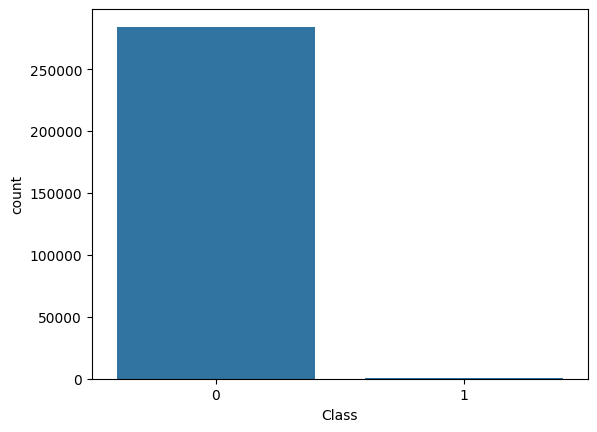

In [29]:
sns.countplot(x='Class', data=fraud_df)

From the aboove above outputs we can conclude that the context given was true, 
1. The data is very skewed
2. There are no null values in the data

## Let us examine only the fraud transactions

<Axes: xlabel='Time', ylabel='Amount'>

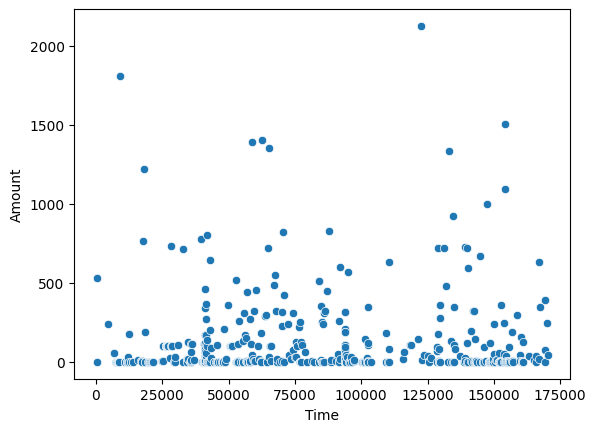

In [32]:
fraud_transactions = fraud_df[fraud_df['Class']==1]
sns.scatterplot(x='Time', y='Amount', data=fraud_transactions)

This lets us conclude that most of the fraudulent transactions are of low amount and they are mostly distributed. 

Let us check if there is a specific day targeted by fraudsters.

In [42]:
# Time is given in seconds 
fraud_df.Time.head(15)

0      0.0
1      0.0
2      1.0
3      1.0
4      2.0
5      2.0
6      4.0
7      7.0
8      7.0
9      9.0
10    10.0
11    10.0
12    10.0
13    11.0
14    12.0
Name: Time, dtype: float64

In [44]:
fraud_df.Time[:-10:-1]

284806    172792.0
284805    172788.0
284804    172788.0
284803    172787.0
284802    172786.0
284801    172785.0
284800    172784.0
284799    172783.0
284798    172782.0
Name: Time, dtype: float64

In [56]:
# Thus it is safe to assume that the value is time elapsed between the nth transaction and first transaction
# but we cannot assume that a transaction associates with a particular day
# 60 x 60 x 24 = 1day
fraud_df.Time.iloc[-1]/(60*60*24)

1.9999074074074075

<Axes: xlabel='Hour', ylabel='Amount'>

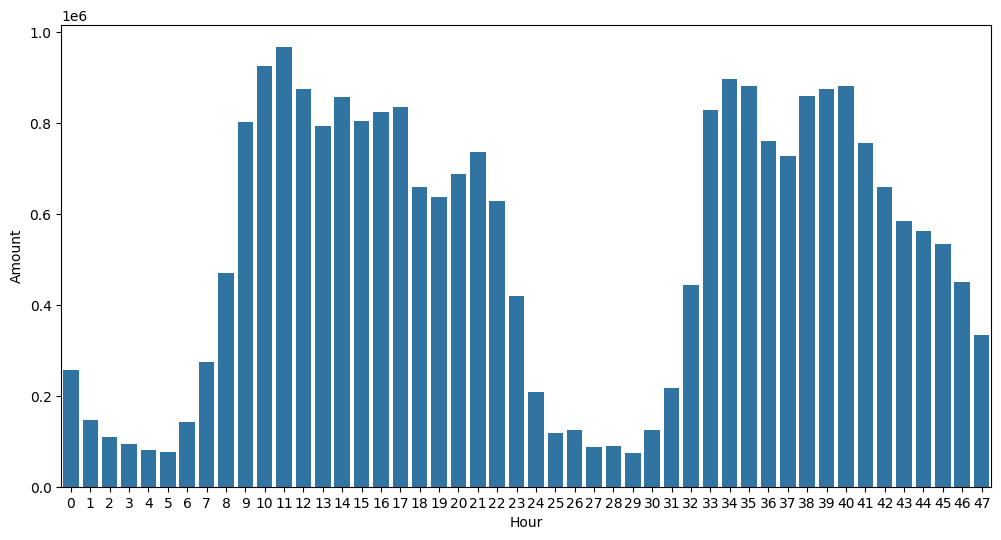

In [69]:
fraud_df_copy = fraud_df
fraud_df_copy['Hour'] = fraud_df['Time'].apply(lambda x: x//3600)
fraud_df_copy = fraud_df_copy.groupby('Hour')['Amount'].sum().reset_index()
fraud_df_copy['Hour'] = fraud_df_copy['Hour'].astype(int)
plt.figure(figsize=(12, 6)) 
sns.barplot(data=fraud_df_copy, x='Hour', y='Amount')

In [68]:

fraud_df_copy.head()

,Hour,Amount
0,0.0,257101
1,1.0,146105
2,2.0,108819
3,3.0,94306
4,4.0,79840
